In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import matplotlib.pyplot as plt

## Задание 1

Функции активации. Требования к функциям активации Популярные функции
активации.

## Задание 2

Используя библиотеку PyTorch, решите задачу регрессии. Разделите набор данных
на обучающее и тестовое множество. Выполните предобработку данных.
Отобразите графики значений функции потерь и метрики на обучающем
множестве. Рассчитайте значение метрики на тестовом множестве.

### Task 1

In [429]:
concrete_df = pd.read_csv('regression/regression/concrete.csv')
concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [430]:
concrete_df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [431]:
concrete_df_X = concrete_df.drop(columns=['strength'])
concrete_df_y = concrete_df['strength']

In [432]:
X_train, X_test, y_train, y_test = train_test_split(concrete_df_X, concrete_df_y, random_state=42, train_size=0.7)

In [433]:
print(X_train.shape)
print(y_train.shape)

(721, 8)
(721,)


In [434]:
class ConcreteDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.scaler = MinMaxScaler()

    def __len__(self):
        return self.X.__len__()

    def __getitem__(self, idx):
        x_tensor = torch.tensor(self.X.iloc[idx , :]).to(torch.float32)
        y_tensor = torch.tensor(self.y.iloc[idx]).to(torch.float32)

        return x_tensor, y_tensor

In [435]:
dataset_train = ConcreteDataset(X_train, y_train)
dataset_test = ConcreteDataset(X_test, y_test)

In [436]:
dataset_train[1]

(tensor([ 325.,    0.,    0.,  184.,    0., 1063.,  783.,    7.]),
 tensor(17.5400))

In [437]:
train_dataloader = DataLoader(dataset=dataset_train, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(dataset=dataset_test, batch_size=64, drop_last=True)

In [438]:
torch.cuda.is_available()

True

In [439]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [443]:
class MultipleRegression(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(MultipleRegression, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, output_dim)

        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x)) 
        x = self.relu(self.layer3(x)) 
        x = self.layer4(x) 
        return x

In [444]:
model_conrete = MultipleRegression(X_train.columns.__len__(), 1)
model_conrete.to(device=device)
optimizer = torch.optim.Adam(model_conrete.parameters(), lr=0.001)

loss_function = nn.MSELoss()

loss_list = []
val_loss_list = []


for epoch in range(1, 20):
    epoch_loss = 0.0
    model_conrete.train()

    for _, (inputs, targets) in enumerate(train_dataloader):
        
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model_conrete(inputs)

        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    "Валидация"
    with torch.no_grad():
        val_epoch_loss = 0.0
        model_conrete.eval()

        for inputs_val, targets_val in test_dataloader:
            inputs_val, targets_val = inputs_val.to(device), targets_val.to(device)

            outputs_val = model_conrete(inputs_val)
            val_loss = loss_function(targets_val, outputs_val.unsqueeze(1))

            val_epoch_loss += val_loss.item()

    loss_list.append(epoch_loss / len(train_dataloader))
    val_loss_list.append(val_epoch_loss / len(test_dataloader))

    print(f'Epoch: {epoch:3d} | Loss: {epoch_loss/ len(train_dataloader):.6f} | Valid. Loss: {val_epoch_loss/ len(test_dataloader):.6f}')


Epoch:   1 | Loss: 2138.809537 | Valid. Loss: 302.331978
Epoch:   2 | Loss: 500.099104 | Valid. Loss: 562.960754
Epoch:   3 | Loss: 394.438119 | Valid. Loss: 290.922340
Epoch:   4 | Loss: 328.722986 | Valid. Loss: 309.340935
Epoch:   5 | Loss: 307.298282 | Valid. Loss: 290.413811
Epoch:   6 | Loss: 306.660456 | Valid. Loss: 289.450104
Epoch:   7 | Loss: 298.751701 | Valid. Loss: 286.061649
Epoch:   8 | Loss: 295.371886 | Valid. Loss: 285.059654
Epoch:   9 | Loss: 299.802708 | Valid. Loss: 284.265732
Epoch:  10 | Loss: 295.658134 | Valid. Loss: 283.632011
Epoch:  11 | Loss: 292.934742 | Valid. Loss: 283.384983
Epoch:  12 | Loss: 294.538551 | Valid. Loss: 282.749840
Epoch:  13 | Loss: 292.330328 | Valid. Loss: 281.771225
Epoch:  14 | Loss: 291.235127 | Valid. Loss: 280.949287
Epoch:  15 | Loss: 289.923931 | Valid. Loss: 280.829140
Epoch:  16 | Loss: 290.932943 | Valid. Loss: 279.909760
Epoch:  17 | Loss: 294.409135 | Valid. Loss: 280.099091
Epoch:  18 | Loss: 291.490828 | Valid. Loss: 27

In [445]:
stats_df = pd.DataFrame({'Train_loss': loss_list, 'Validation Loss': val_loss_list})
stats_df.head()

,Train_loss,Validation Loss
0,2138.809537,302.331978
1,500.099104,562.960754
2,394.438119,290.922340
3,328.722986,309.340935
4,307.298282,290.413811


In [446]:
stats_df = pd.DataFrame({'Train_loss': loss_list, 'Validation Loss': val_loss_list})
stats_df_melt = stats_df.reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
print(stats_df_melt['variable'].unique())
stats_df_melt.head()

['Train_loss' 'Validation Loss']


,epochs,variable,value
0,0,Train_loss,2138.809537
1,1,Train_loss,500.099104
2,2,Train_loss,394.438119
3,3,Train_loss,328.722986
4,4,Train_loss,307.298282


['Train_loss' 'Validation Loss']


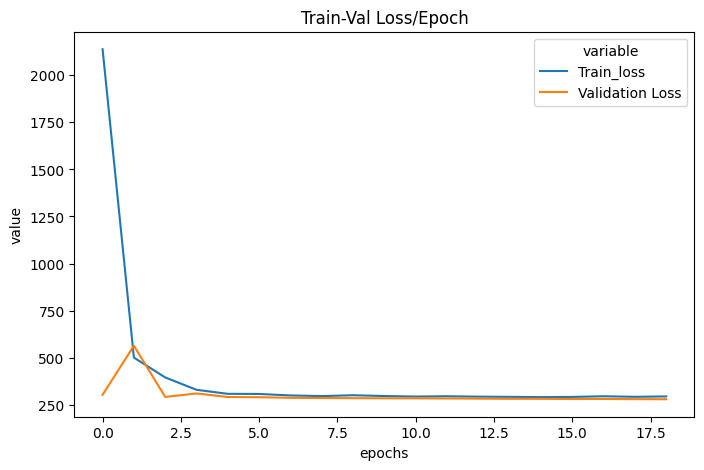

In [447]:
stats_df = pd.DataFrame({'Train_loss': loss_list, 'Validation Loss': val_loss_list})
stats_df_melt = stats_df.reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
print(stats_df_melt['variable'].unique())
stats_df_melt.head()

plt.figure(figsize=(8,5))
sns.lineplot(data=stats_df_melt, x ="epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
plt.savefig("test.png")
plt.show()

### Task 2

In [3]:
gold_df = pd.read_csv('regression/regression/gold.csv')
gold_df.head()

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
0,0.000000,0.000879,0.001050,0.013158,0.013562,0.003163,-0.007879,-0.004945,-0.003486,-0.024706,...,-0.009862,0.073090,-0.028816,-0.001613,-0.012274,-0.025210,0.024300,0.082695,0.053534,0.004648
1,-0.004587,0.004096,0.002383,0.043599,0.041035,0.040991,0.042356,0.039759,0.029667,0.047906,...,0.006801,0.099088,-0.043704,0.007670,0.018151,0.060624,0.068595,0.151468,0.085822,-0.002105
2,-0.003465,-0.002040,0.000856,0.020444,0.017995,0.003462,0.006222,0.006541,0.007172,0.005262,...,0.014873,0.102887,-0.051438,0.007525,0.028712,0.056289,0.083520,0.134763,0.083915,-0.037438
3,-0.004624,0.000584,-0.002090,-0.015679,-0.012626,0.021992,0.003029,0.004249,0.002498,0.020775,...,0.004931,0.087208,-0.054678,0.005445,0.001445,0.041620,0.061601,0.109940,0.076738,-0.028097
4,-0.009292,-0.000486,0.001047,-0.003540,-0.002558,-0.012658,-0.024912,-0.022026,-0.023551,-0.025000,...,-0.003838,0.076564,-0.076171,-0.009558,-0.003904,0.058352,0.069414,0.094311,0.084487,-0.045466


In [232]:
gold_df.describe()

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,...,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,0.000832,0.000054,0.000035,0.000105,0.000083,0.000081,0.000063,0.000048,0.000039,-0.000126,...,0.001521,0.001640,0.007724,0.002843,0.001348,0.003429,-0.002040,0.016255,0.004002,0.003222
std,0.007570,0.004277,0.002073,0.018729,0.017929,0.014268,0.018331,0.017958,0.019077,0.016468,...,0.050782,0.067590,0.055285,0.047920,0.053453,0.082057,0.058466,0.081979,0.044998,0.044198
min,-0.075051,-0.044433,-0.012440,-0.086872,-0.090000,-0.112903,-0.084337,-0.083457,-0.100408,-0.117669,...,-0.186586,-0.316587,-0.188626,-0.185257,-0.194926,-0.303009,-0.212727,-0.267772,-0.149107,-0.149107
25%,-0.002105,-0.001950,-0.001127,-0.011117,-0.010545,-0.006871,-0.009334,-0.009379,-0.010202,-0.008780,...,-0.028663,-0.037221,-0.025363,-0.024215,-0.031686,-0.049056,-0.041553,-0.037162,-0.023329,-0.023619
50%,0.000000,0.000092,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003532,0.002802,0.011238,0.006085,0.002076,-0.005047,-0.004983,0.018242,0.001952,0.001441
75%,0.003278,0.002254,0.001346,0.010361,0.009619,0.006567,0.009706,0.009532,0.010429,0.008175,...,0.035178,0.036260,0.044586,0.033261,0.037184,0.052980,0.039107,0.069460,0.032227,0.031532
max,0.145989,0.033682,0.008395,0.093916,0.118492,0.153199,0.089039,0.090140,0.099622,0.104769,...,0.182996,0.275124,0.193466,0.189002,0.194412,0.305908,0.223757,0.288488,0.194723,0.194723


### Task 3

In [448]:
house_df = pd.read_csv('regression/regression/house.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [249]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [449]:
# house_df = house_df.drop(columns=['Id'])
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


In [450]:
house_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

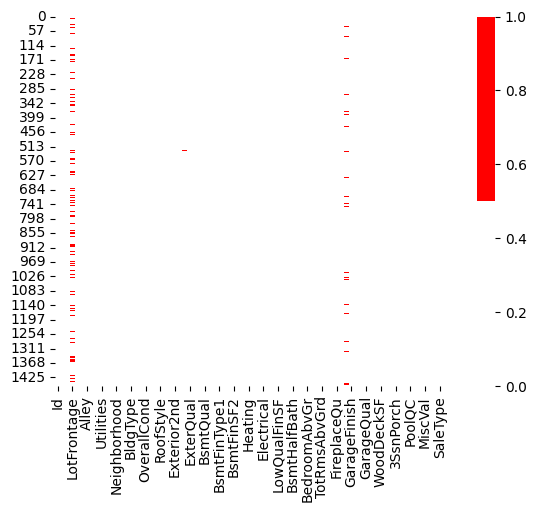

In [451]:
colours = ["white", "red"] 
sns.heatmap(house_df.isnull(), cmap=sns.color_palette(colours));
plt.savefig("headt.png")

In [452]:
categorical_columns = [2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 40, 41, 42, 43, 54, 56, 58, 59, 61, 64, 65, 66, 73, 74, 75, 79, 80 ]
to_normalize_cols = [20, 21, 35]


categorical_columns = [x-1 for x in categorical_columns]
to_normalize_cols = [x-1 for x in categorical_columns]

In [453]:
label_encoder = LabelEncoder()

def preprocess_categorial_df(df, categorical_columns):
    for idx, col in enumerate(df.columns):
        if df[col].isnull().sum() > 0:
            print(f"Null column {idx} {col}")

        if idx in categorical_columns:
            # print(f"Col name: {col}")
            un_vals = len(df[col].unique())
            df[col] = label_encoder.fit_transform(df[col].values)
            df[col] = df[col].fillna(df[col].max() + 1)
            assert un_vals == df[col].unique().__len__()
        else:
            # print(idx, col)
            # print(df[col].dtype)
            pass


    df['LotFrontage'] = df['LotFrontage'].fillna(0)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

    print(df.isna().sum().sum())
    return df

df_c = house_df.copy()
res_df = preprocess_categorial_df(df_c, categorical_columns)

Null column 3 LotFrontage
Null column 26 MasVnrArea
Null column 59 GarageYrBlt
0


In [454]:
res_df.drop(columns=['Id'], inplace=True)

In [456]:
res_df.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice          int64
Length: 80, dtype: object

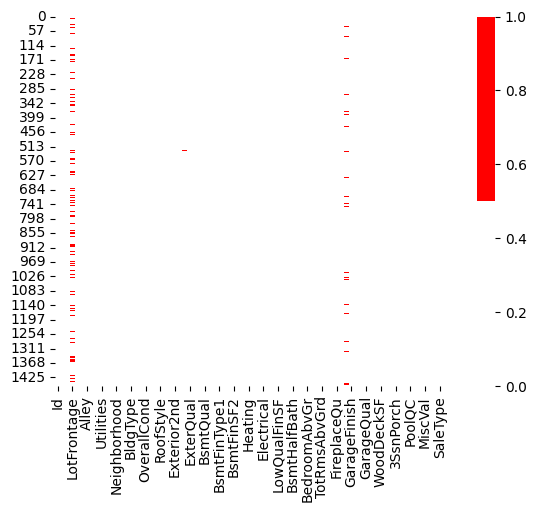

In [457]:
colours = ["white", "red"] 
sns.heatmap(house_df.isnull(), cmap=sns.color_palette(colours));
plt.savefig("heat_n.png")

In [458]:
X_train, X_test, y_train, y_test = train_test_split(res_df.iloc[:, :-1], res_df.iloc[:, -1])

In [459]:
scaler = MinMaxScaler()

In [460]:
X_train = pd.DataFrame(scaler.fit_transform(X_train)) 
X_train

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.500000,1.00,0.191693,0.050808,1.0,0.0,1.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,1.00,0.25,0.000000,0.272727,0.50,1.0,0.8
1,0.285714,0.75,0.191693,0.054077,1.0,0.5,1.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,1.00,0.25,0.000000,0.545455,0.25,1.0,0.8
2,0.000000,0.75,0.207668,0.033472,1.0,0.5,0.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,0.00,0.25,0.000000,0.363636,0.50,1.0,0.8
3,0.357143,0.75,0.258786,0.059035,1.0,0.5,0.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,1.00,0.25,0.000000,0.636364,0.50,1.0,0.8
4,0.000000,0.75,0.000000,0.042520,1.0,0.5,0.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,0.50,0.25,0.000000,0.363636,1.00,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.285714,1.00,0.159744,0.013467,1.0,0.0,1.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,0.75,0.25,0.000000,0.272727,0.75,1.0,0.8
1091,0.357143,0.75,0.000000,0.060419,1.0,0.5,0.333333,1.0,0.0,0.00,...,0.0,0.0,1.0,0.00,0.25,0.000000,0.272727,0.00,1.0,0.8
1092,0.357143,0.75,0.198083,0.037433,1.0,0.5,0.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,1.00,0.25,0.000000,0.272727,0.50,1.0,0.8
1093,0.000000,0.75,0.239617,0.051726,1.0,0.5,1.000000,1.0,0.0,1.00,...,0.0,0.0,1.0,1.00,0.75,0.032258,0.272727,0.25,0.0,0.8


In [461]:
X_test = pd.DataFrame(scaler.transform(X_test))
X_test

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.428571,0.75,0.236422,0.065426,1.0,0.5,0.0,0.333333,0.0,1.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.636364,0.50,1.000,0.8
1,0.285714,1.00,0.271565,0.044074,1.0,0.5,1.0,1.000000,0.0,0.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.636364,0.25,1.000,0.8
2,0.000000,0.75,0.233227,0.046517,1.0,0.5,0.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.636364,0.25,0.750,1.0
3,1.000000,0.75,0.191693,0.066601,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,0.5,0.25,0.000000,0.545455,1.00,1.000,0.8
4,0.000000,0.75,0.242812,0.047870,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.6,0.0,1.0,1.0,0.75,0.090323,0.909091,0.50,1.000,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.000000,0.75,0.217252,0.058643,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.636364,0.50,0.375,0.8
361,0.357143,0.75,0.297125,0.065493,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.363636,0.25,1.000,0.8
362,0.357143,0.75,0.217252,0.046192,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,1.0,0.25,0.000000,0.636364,0.00,0.750,1.0
363,0.285714,0.75,0.166134,0.045550,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,1.0,0.5,0.25,0.000000,0.272727,1.00,1.000,0.8


In [462]:
X_train.shape

(1095, 79)

In [463]:
y_train.shape

(1095,)

In [467]:
class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.scaler = MinMaxScaler()

    def __len__(self):
        return self.X.__len__()

    def __getitem__(self, idx):
        x_tensor = torch.tensor(self.X.iloc[idx , :]).to(torch.float32)
        y_tensor = torch.tensor(self.y.iloc[idx]).to(torch.float32)

        return x_tensor, y_tensor

train_housedataset = HouseDataset(X_train, y_train)
test_housedataset = HouseDataset(X_test, y_test)

train_dataloader_house = DataLoader(train_housedataset, batch_size=64, shuffle=True, drop_last=True)
test_dataloader_house = DataLoader(test_housedataset, batch_size=64, drop_last=True)


In [468]:
train_housedataset.__len__() / 32

34.21875

In [469]:
test_housedataset.__len__() / 32

11.40625

In [470]:
class HouseMultipleRegression(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(HouseMultipleRegression, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 64)
        self.do = nn.Dropout(0.2)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.layer5 = nn.Linear(16, output_dim)
        self.do2 = nn.Dropout(0.2)
        self.activation = nn.Softmax()


    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.do(x)
        x = self.activation(self.layer3(x))
        x = self.do2(x)
        x = self.activation(self.layer4(x))
        x = self.layer5(x)
        return x

    def predict(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.layer5(x)
        return x


In [479]:
model_house = HouseMultipleRegression(X_train.columns.__len__(), 1)
model_house.to(device=device)
optimizer = torch.optim.SGD(model_house.parameters(), lr=0.0005)
# loss_function = nn.HuberLoss()
loss_function = nn.MSELoss()

loss_list = []
val_loss_list = []


for epoch in range(1, 51):
    epoch_loss = 0.0
    model_house.train()

    for _, (inputs, targets) in enumerate(train_dataloader_house):
        
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model_house(inputs)

        outputs = torch.reshape(outputs, (-1,))

        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    "Валидация"
    with torch.no_grad():
        val_epoch_loss = 0.0
        model_house.eval()

        for inputs_val, targets_val in test_dataloader_house:
            inputs_val, targets_val = inputs_val.to(device), targets_val.to(device)

            outputs_val = model_house(inputs_val)
            outputs_val = torch.reshape(outputs, (-1,))
            
            val_loss = loss_function(targets_val, outputs_val)

            val_epoch_loss += val_loss.item()

    loss_list.append(epoch_loss / len(train_dataloader))
    val_loss_list.append(val_epoch_loss / len(test_dataloader_house))

    print(f'Epoch: {epoch:3d} | Loss: {epoch_loss/ len(train_dataloader_house):.6f} | Valid. Loss: {val_epoch_loss/ len(test_dataloader_house):.6f}')


C:\Users\a0932\AppData\Local\Temp\ipykernel_5060\1744282412.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.activation(self.layer1(x))
C:\Users\a0932\AppData\Local\Temp\ipykernel_5060\1744282412.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.activation(self.layer2(x))
C:\Users\a0932\AppData\Local\Temp\ipykernel_5060\1744282412.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.activation(self.layer3(x))
C:\Users\a0932\AppData\Local\Temp\ipykernel_5060\1744282412.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.activation(self.layer4(x))


Epoch:   1 | Loss: 38732553396.705879 | Valid. Loss: 33946957414.400002
Epoch:   2 | Loss: 36617546450.823532 | Valid. Loss: 31981928857.599998
Epoch:   3 | Loss: 34599100777.411766 | Valid. Loss: 30145548697.599998
Epoch:   4 | Loss: 32664257596.235294 | Valid. Loss: 28425619456.000000
Epoch:   5 | Loss: 31086475023.058823 | Valid. Loss: 26820757504.000000
Epoch:   6 | Loss: 29423403008.000000 | Valid. Loss: 25331655884.799999
Epoch:   7 | Loss: 27924444340.705883 | Valid. Loss: 23947278336.000000
Epoch:   8 | Loss: 26549993351.529411 | Valid. Loss: 22637103513.599998
Epoch:   9 | Loss: 25226322642.823528 | Valid. Loss: 21423245312.000000
Epoch:  10 | Loss: 23964215476.705883 | Valid. Loss: 20293458329.599998
Epoch:  11 | Loss: 22826378179.764706 | Valid. Loss: 19235802726.400002
Epoch:  12 | Loss: 21723896591.058823 | Valid. Loss: 18247517184.000000
Epoch:  13 | Loss: 20705778145.882355 | Valid. Loss: 17334788505.599998
Epoch:  14 | Loss: 19814162130.823528 | Valid. Loss: 16481509376

['Train_loss' 'Validation Loss']


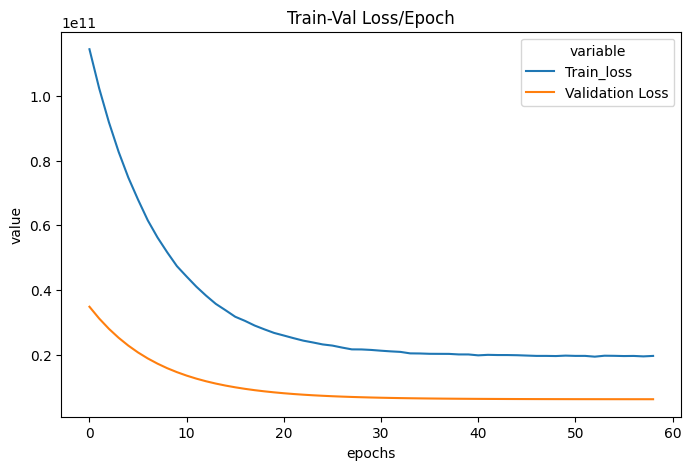

In [420]:
stats_df = pd.DataFrame({'Train_loss': loss_list, 'Validation Loss': val_loss_list})
stats_df_melt = stats_df.reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
print(stats_df_melt['variable'].unique())
stats_df_melt.head()

plt.figure(figsize=(8,5))
sns.lineplot(data=stats_df_melt, x="epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')
plt.savefig("houses.png")
plt.show()

In [421]:
inp, expexted = test_housedataset[0]
inp

tensor([0.3571, 0.2500, 0.2716, 0.0454, 1.0000, 0.5000, 1.0000, 1.0000, 0.0000,
        1.0000, 0.0000, 0.8750, 0.2500, 0.2857, 0.0000, 0.7143, 1.0000, 0.5000,
        0.9927, 0.9667, 0.2000, 0.1429, 0.8571, 0.8667, 1.0000, 0.1000, 0.0000,
        1.0000, 0.4000, 0.0000, 1.0000, 0.0000, 0.3333, 0.1355, 1.0000, 0.0000,
        0.1079, 0.1664, 0.2000, 0.0000, 1.0000, 1.0000, 0.1514, 0.5240, 0.0000,
        0.3015, 0.5000, 0.0000, 0.6667, 0.5000, 0.3750, 0.0000, 0.0000, 0.6364,
        1.0000, 0.3333, 0.0000, 0.1667, 0.9990, 0.0000, 0.7500, 0.5726, 1.0000,
        1.0000, 1.0000, 0.1960, 0.0951, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 0.2500, 0.0000, 0.2727, 0.7500, 1.0000, 0.8000])

In [422]:
expexted

tensor(310000.)

In [5]:
insurance_df = pd.read_csv('regression/regression/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
vehicle_df = pd.read_csv('regression/regression/vehicle.csv')
vehicle_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Задание 3

При помощи возможностей по автоматическому дифференцированию, которые
предоставляет библиотека PyTorch, найдите минимум функции на отрезке [-10,
10]. Реализуйте процесс поиска экстремума таким образом, чтобы при нахождении
точки экстремума процедура поиска останавливалась. Продемонстрируйте процесс
оптимизации. Изобразите график функции на заданном отрезке. (20 баллов)

In [16]:
!jt -t grade3

In [17]:
import torch.autograd as taut

In [13]:
import math

In [93]:
gaps = [-10, 10]
def func(x):
#     print(f"{x}  -  {x*x + 10*x + 10}")
#     return np.log(x*x + 10*x + 10)
    return np.sin(x**2) 
    
data = pd.Series(dtype='float64')
x_vals = np.arange(-10.0 , 10.0, 0.2)

for x in x_vals:
    data = data.append(pd.Series(func(x), index=[x]))

In [119]:
x = torch.tensor(np.random.rand(1)).requires_grad_(True)

while (x.grad is None or torch.abs(x.grad)>0.01):
    if (x.grad is not None):
        # zero grads
        x.grad.data.zero_()
    # compute fn
    y = torch.log(x**2+10)
    # compute grads
    y.backward()
    # move in direction of / opposite to grads
    x.data = x.data - 0.01*x.grad.data
    # use below line to move uphill 
    # x.data = x.data + 0.01*x.grad.data

print(x)
print(y)
print(x.grad)

tensor([0.0499], dtype=torch.float64, requires_grad=True)
tensor([2.3028], dtype=torch.float64, grad_fn=<LogBackward0>)
tensor([0.0100], dtype=torch.float64)


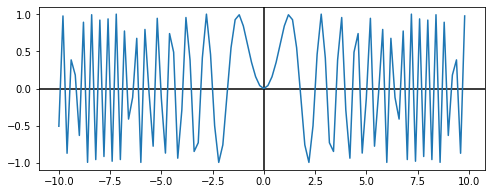

In [120]:
plt.figure(figsize=(8, 3))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
sns.lineplot(data=data)

plt.show()

In [76]:
x = torch.tensor(np.random.rand(1)).requires_grad_(True)
x.data

tensor([0.6319], dtype=torch.float64)

In [175]:
# Инициализация тензоар,
# x = torch.tensor(np.random.rand(1)).requires_grad_(True)
start = -10.0
end = 10.0

x = torch.tensor(start).requires_grad_(True)
y = torch.log(x**2+10)
rate = 0.01

x_vals = []
y_vals = []

counter = 0
while (x.grad is None or torch.abs(x.grad)>rate):
    if (start <= x <= end) and y != np.nan:
        counter += 1
        
        if x**2+10*x+10 <= 0:
            print(x)
            break
        
        if (x.grad is not None):
            x.grad.data.zero_()

        y = torch.log(x**2+10*x+10)
        # compute grads
        y.backward()
        # move in direction of / opposite to grads
        x.data = x.data - rate*x.grad.data
        
        x_vals.append(x.item())
        y_vals.append(y.item())
        
        # use below line to move uphill 
        # x.data = x.data + 0.01*x.grad.data
    else:
        print("X out of Ed")
        break

print(f"Done in {counter} iterations")
print(f"X = {x.item()}, Grad = {x.grad}")
print(f"y = {y}")
print(type(y.item()))


tensor(-1.2723, requires_grad=True)
Done in 2210 iterations
X = -1.272286057472229, Grad = 19.64954948425293
y = -0.9177423119544983
<class 'float'>


In [176]:
data = pd.Series(y_vals[:-1], index=x_vals[:-1])
# data = pd.Series(y_vals, index=x_vals)
data

-9.990000    2.302585
-9.979919    2.292545
-9.969756    2.282341
-9.959508    2.271968
-9.949172    2.261421
               ...   
-0.858750    0.890014
-0.897274    0.765445
-0.942055    0.605604
-0.997381    0.383163
-1.075791    0.020739
Length: 2208, dtype: float64

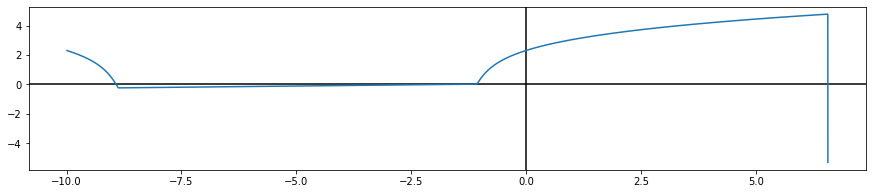

In [180]:
plt.figure(figsize=(15, 3))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
sns.lineplot(data=data)

plt.show()

In [183]:
#-------------

In [192]:
# Инициализация тензоар,
# x = torch.tensor(np.random.rand(1)).requires_grad_(True)
start = -1.5
end = 1.5

x = torch.tensor(start).requires_grad_(True)
y = torch.tensor(x**3-x+2)
print(y)

rate = 0.01

x_vals = []
y_vals = []

counter = 0
while (x.grad is None or torch.abs(x.grad)>rate):
    if (start <= x <= end) and y != np.nan:
        counter += 1
        
#         if x**2+10*x+10 <= 0:
#             print(x)
#             break
        
        if (x.grad is not None):
            x.grad.data.zero_()

        y = torch.tensor(x**3-x+2)
        # compute grads
        y.backward()
        # move in direction of / opposite to grads
        x.data = x.data - rate*x.grad.data
        
        x_vals.append(x.item())
        y_vals.append(y.item())
        
        # use below line to move uphill 
        # x.data = x.data + 0.01*x.grad.data
    else:
        print("X out of Ed")
        break

print(f"Done in {counter} iterations")
print(f"X = {x.item()}, Grad = {x.grad}")
print(f"y = {y}")
print(type(y.item()))

data = pd.Series(y_vals[:-1], index=x_vals[:-1])



tensor(0.1250)


C:\Users\a0932\AppData\Local\Temp/ipykernel_23712/59893923.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x**3-x+2)
C:\Users\a0932\AppData\Local\Temp/ipykernel_23712/59893923.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x**3-x+2)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

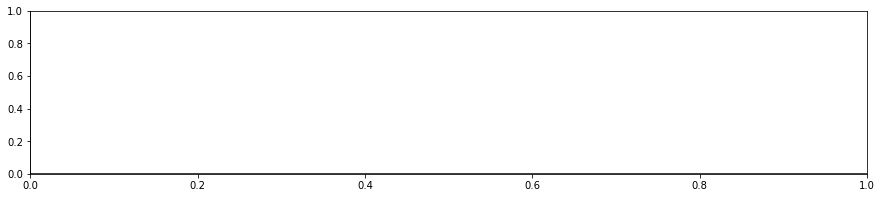

In [188]:
plt.figure(figsize=(15, 3))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
sns.lineplot(data=data)

plt.show()